### Importación de datos



Se extraen los datos desde el github de Alura LATAM y se crean df a partir dee los csv

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
#Importacion de librerias
import matplotlib.pyplot as plt
import seaborn as sns

#1. Análisis de facturación



In [4]:
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

print(f'Ingreso de la Tienda 1: ${ingreso_tienda1: ,.2f}')
print(f'Ingreso de la Tienda 2: ${ingreso_tienda2: ,.2f}')
print(f'Ingreso de la Tienda 3: ${ingreso_tienda3: ,.2f}')
print(f'Ingreso de la Tienda 4: ${ingreso_tienda4: ,.2f}')

Ingreso de la Tienda 1: $ 1,150,880,400.00
Ingreso de la Tienda 2: $ 1,116,343,500.00
Ingreso de la Tienda 3: $ 1,098,019,600.00
Ingreso de la Tienda 4: $ 1,038,375,700.00


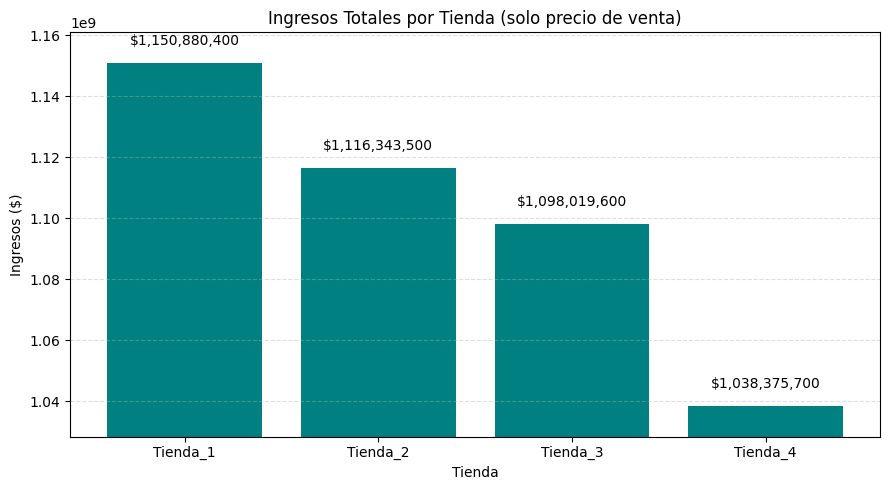

In [5]:
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
tiendas = ["Tienda_1", "Tienda_2", "Tienda_3", "Tienda_4"]

min_ingreso = min(ingresos)
y_min = min_ingreso - 10000000
y_max = max(ingresos) + 10000000

plt.figure(figsize=(9,5))
bars = plt.bar(tiendas, ingresos, color='teal')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5000000, f"${yval:,.0f}", ha='center', va='bottom')

plt.title("Ingresos Totales por Tienda (solo precio de venta)")
plt.ylabel("Ingresos ($)")
plt.xlabel("Tienda")
plt.ylim(y_min, y_max)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [6]:
ventas_cat1 = tienda["Categoría del Producto"].value_counts().head(5)
ventas_cat1.columns = ["Categoría", "Cantidad de Ventas"]

ventas_cat2 = tienda2["Categoría del Producto"].value_counts().head(5)
ventas_cat2.columns = ["Categoría", "Cantidad de Ventas"]

ventas_cat3 = tienda3["Categoría del Producto"].value_counts().head(5)
ventas_cat3.columns = ["Categoría", "Cantidad de Ventas"]

ventas_cat4 = tienda4["Categoría del Producto"].value_counts().head(5)
ventas_cat4.columns = ["Categoría", "Cantidad de Ventas"]

print("🔹Tienda 1:\n", ventas_cat1)
print("\n🔹Tienda 2:\n", ventas_cat2)
print("\n🔹Tienda 3:\n", ventas_cat3)
print("\n🔹Tienda 4:\n", ventas_cat4)

🔹Tienda 1:
 Categoría del Producto
Muebles                 465
Electrónicos            448
Juguetes                324
Electrodomésticos       312
Deportes y diversión    284
Name: count, dtype: int64

🔹Tienda 2:
 Categoría del Producto
Muebles                 442
Electrónicos            422
Juguetes                313
Electrodomésticos       305
Deportes y diversión    275
Name: count, dtype: int64

🔹Tienda 3:
 Categoría del Producto
Muebles                 499
Electrónicos            451
Juguetes                315
Electrodomésticos       278
Deportes y diversión    277
Name: count, dtype: int64

🔹Tienda 4:
 Categoría del Producto
Muebles                 480
Electrónicos            451
Juguetes                338
Deportes y diversión    277
Electrodomésticos       254
Name: count, dtype: int64


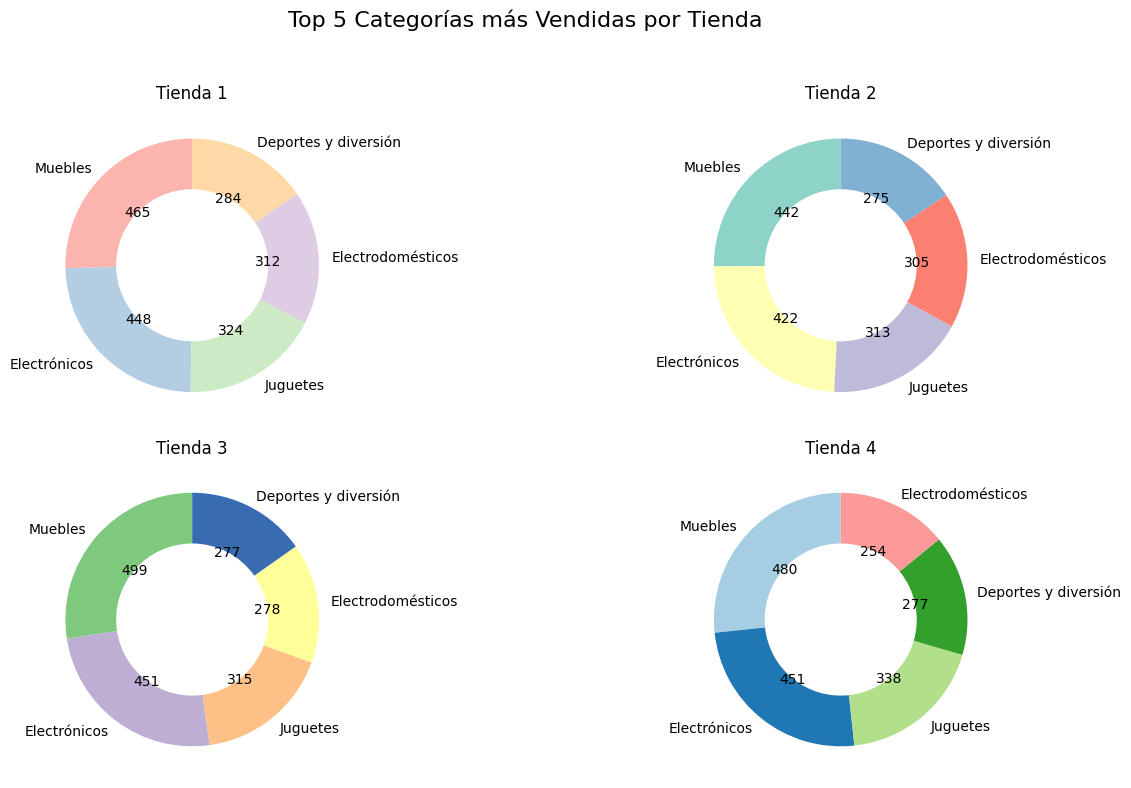

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("Top 5 Categorías más Vendidas por Tienda", fontsize=16)

datos = [ventas_cat1, ventas_cat2, ventas_cat3, ventas_cat4]
titulos = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
colores = [plt.cm.Pastel1.colors, plt.cm.Set3.colors, plt.cm.Accent.colors, plt.cm.Paired.colors]

def autopct_valores(valores):
    def func(pct):
        total = sum(valores)
        valor = int(round(pct * total / 100.0))
        return f'{valor}'
    return func

for i, ax in enumerate(axs.flat):
    data = datos[i]
    wedges, texts, autotexts = ax.pie(
        data.values,
        labels=data.index,
        autopct=autopct_valores(data.values),
        colors=colores[i],
        startangle=90,
        wedgeprops=dict(width=0.4)
    )
    ax.set_title(titulos[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 3. Calificación promedio de la tienda


In [8]:
promedio_calif1 = tienda["Calificación"].mean()
promedio_calif2 = tienda2["Calificación"].mean()
promedio_calif3 = tienda3["Calificación"].mean()
promedio_calif4 = tienda4["Calificación"].mean()

print(f"Calificacion promedio de la tienda 1: {promedio_calif1: .2f}")
print(f"Calificacion promedio de la tienda 2: {promedio_calif2: .2f}")
print(f"Calificacion promedio de la tienda 3: {promedio_calif3: .2f}")
print(f"Calificacion promedio de la tienda 4: {promedio_calif4: .2f}")

Calificacion promedio de la tienda 1:  3.98
Calificacion promedio de la tienda 2:  4.04
Calificacion promedio de la tienda 3:  4.05
Calificacion promedio de la tienda 4:  4.00


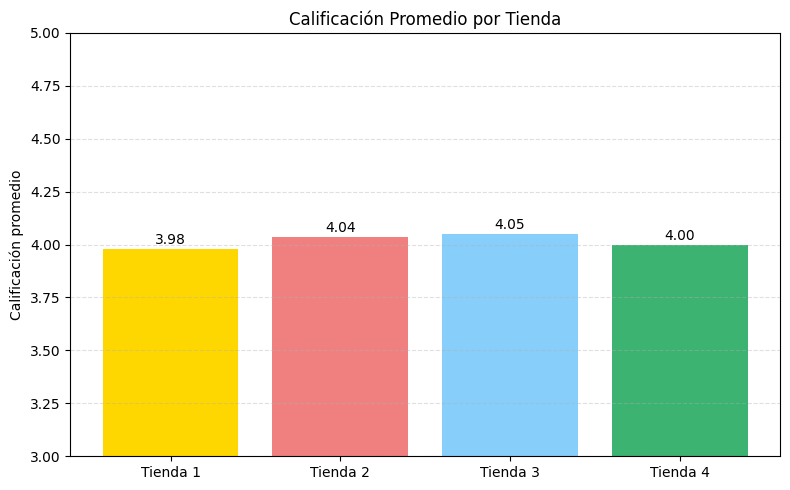

In [9]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios_calif = [promedio_calif1, promedio_calif2, promedio_calif3, promedio_calif4]

plt.figure(figsize=(8,5))
bars = plt.bar(tiendas, promedios_calif, color=['gold', 'lightcoral', 'lightskyblue', 'mediumseagreen'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.ylabel('Calificación promedio')
plt.title('Calificación Promedio por Tienda')
plt.ylim(3, 5)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [10]:
# Tienda 1
top_5_t1 = tienda['Producto'].value_counts().head(5)
bottom_5_t1 = tienda['Producto'].value_counts().tail(5)

# Tienda 2
top_5_t2 = tienda2['Producto'].value_counts().head(5)
bottom_5_t2 = tienda2['Producto'].value_counts().tail(5)

# Tienda 3
top_5_t3 = tienda3['Producto'].value_counts().head(5)
bottom_5_t3 = tienda3['Producto'].value_counts().tail(5)

# Tienda 4
top_5_t4 = tienda4['Producto'].value_counts().head(5)
bottom_5_t4 = tienda4['Producto'].value_counts().tail(5)

print("🔹 Tienda 1 - Productos más vendidos:\n", top_5_t1)
print("\n🔹 Tienda 1 - Productos menos vendidos:\n", bottom_5_t1)
print("\n🔹 Tienda 2 - Productos más vendidos:\n", top_5_t2)
print("\n🔹 Tienda 2 - Productos menos vendidos:\n", bottom_5_t2)
print("\n🔹 Tienda 3 - Productos más vendidos:\n", top_5_t3)
print("\n🔹 Tienda 3 - Productos menos vendidos:\n", bottom_5_t3)
print("\n🔹 Tienda 4 - Productos más vendidos:\n", top_5_t4)
print("\n🔹 Tienda 4 - Productos menos vendidos:\n", bottom_5_t4)

🔹 Tienda 1 - Productos más vendidos:
 Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

🔹 Tienda 1 - Productos menos vendidos:
 Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

🔹 Tienda 2 - Productos más vendidos:
 Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

🔹 Tienda 2 - Productos menos vendidos:
 Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

🔹 Tienda 3 - Productos más vendidos:
 Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de no

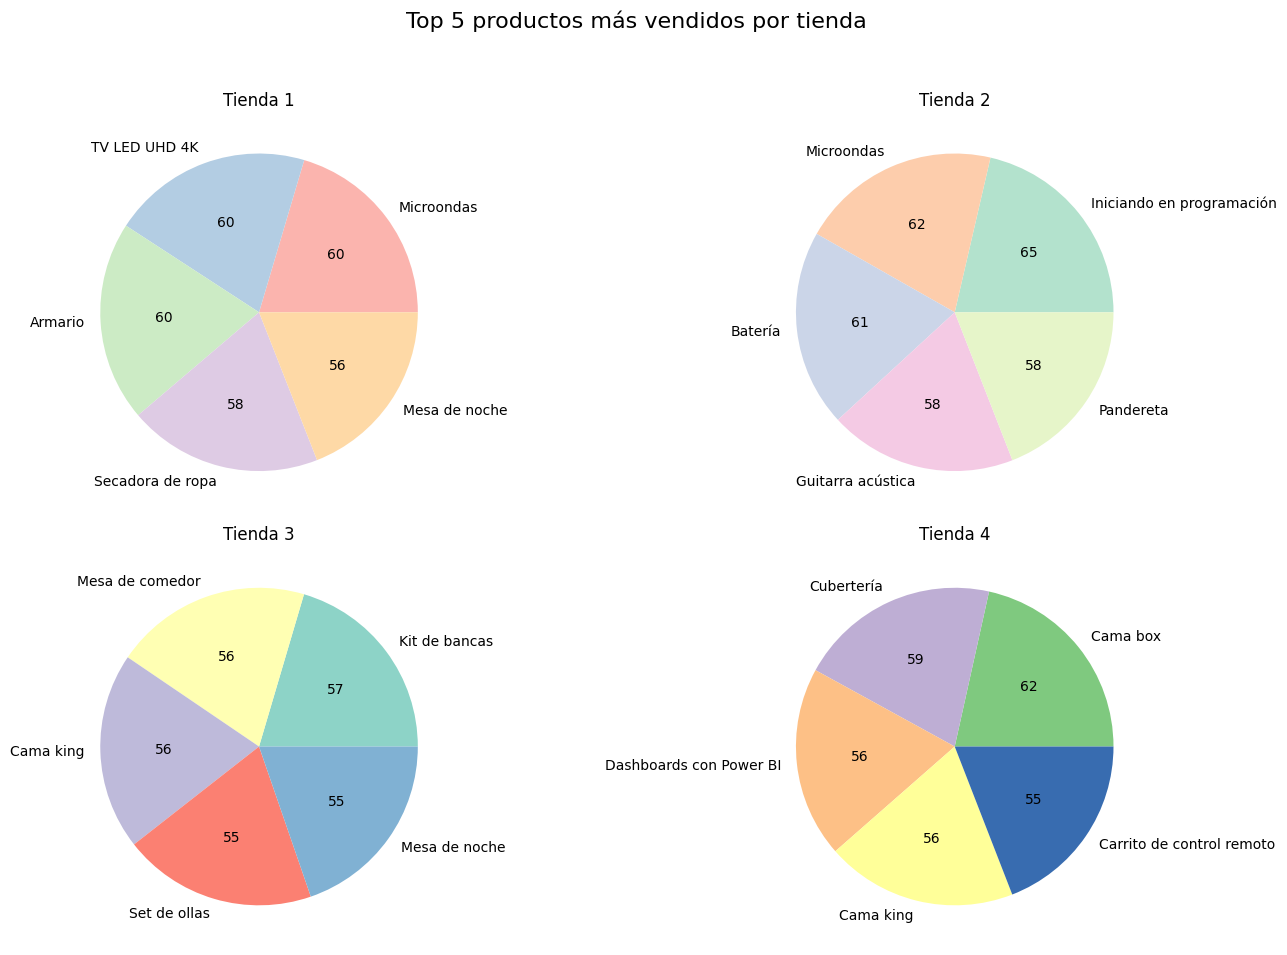

In [11]:
def autopct_valores_absolutos(valores):
    def mostrar_valor(pct):
        total = sum(valores)
        valor = int(round(pct * total / 100.0))
        return f'{valor}'
    return mostrar_valor

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Top 5 productos más vendidos por tienda', fontsize=16)

# Tienda 1
axs[0, 0].pie(top_5_t1.values, labels=top_5_t1.index, autopct=autopct_valores_absolutos(top_5_t1.values), colors=plt.cm.Pastel1.colors)
axs[0, 0].set_title('Tienda 1')

# Tienda 2
axs[0, 1].pie(top_5_t2.values, labels=top_5_t2.index, autopct=autopct_valores_absolutos(top_5_t2.values), colors=plt.cm.Pastel2.colors)
axs[0, 1].set_title('Tienda 2')

# Tienda 3
axs[1, 0].pie(top_5_t3.values, labels=top_5_t3.index, autopct=autopct_valores_absolutos(top_5_t3.values), colors=plt.cm.Set3.colors)
axs[1, 0].set_title('Tienda 3')

# Tienda 4
axs[1, 1].pie(top_5_t4.values, labels=top_5_t4.index, autopct=autopct_valores_absolutos(top_5_t4.values), colors=plt.cm.Accent.colors)
axs[1, 1].set_title('Tienda 4')

# Ajustes finales
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

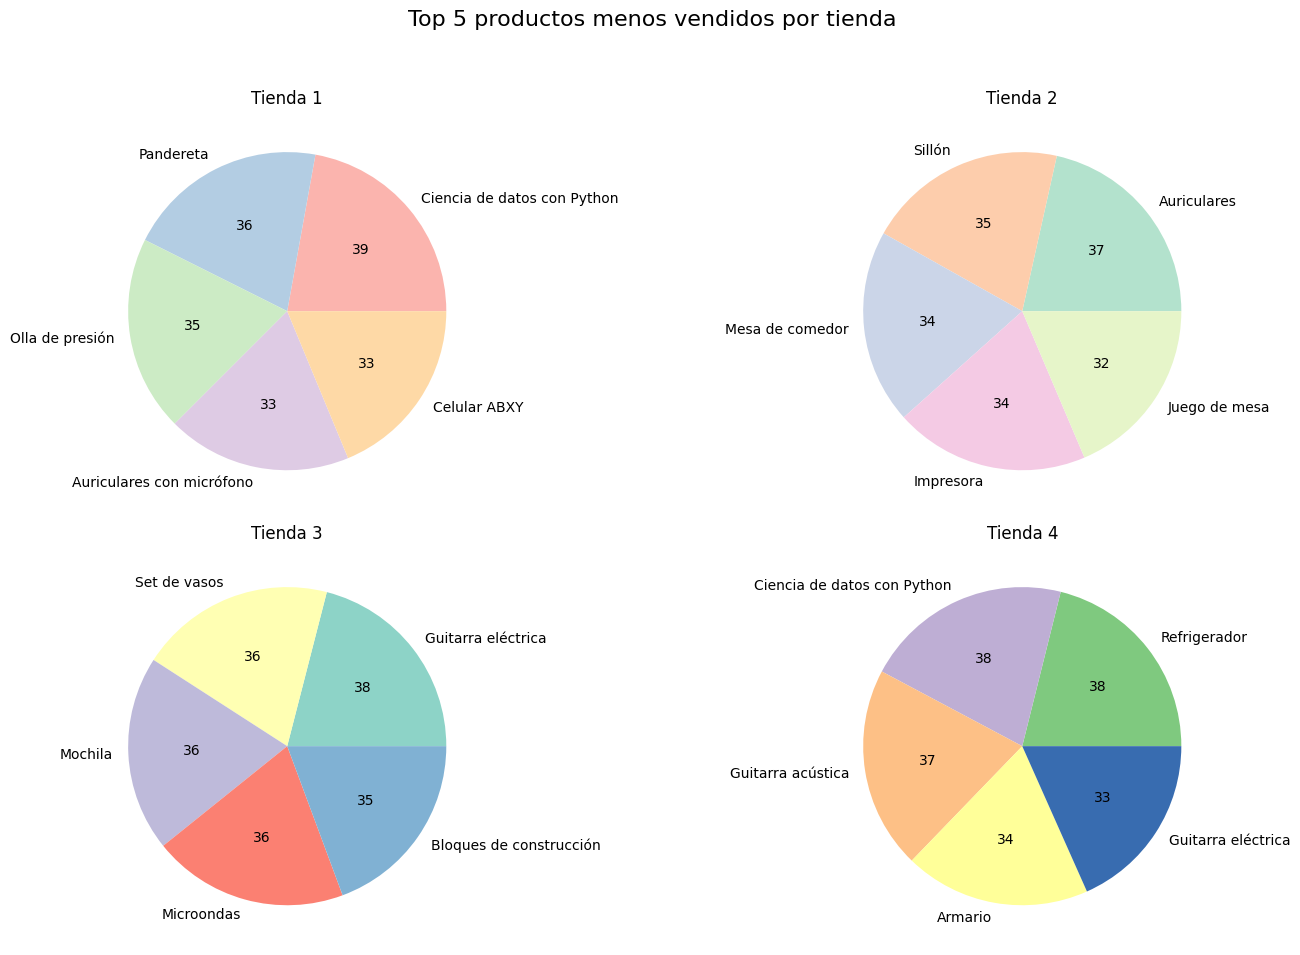

In [12]:
# Función para mostrar valores absolutos en lugar de porcentajes
def autopct_valores_absolutos(valores):
    def mostrar_valor(pct):
        total = sum(valores)
        valor = int(round(pct * total / 100.0))
        return f'{valor}'
    return mostrar_valor

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Top 5 productos menos vendidos por tienda', fontsize=16)

# Tienda 1
axs[0, 0].pie(bottom_5_t1.values,
              labels=bottom_5_t1.index,
              autopct=autopct_valores_absolutos(bottom_5_t1.values),
              colors=plt.cm.Pastel1.colors)
axs[0, 0].set_title('Tienda 1')

# Tienda 2
axs[0, 1].pie(bottom_5_t2.values,
              labels=bottom_5_t2.index,
              autopct=autopct_valores_absolutos(bottom_5_t2.values),
              colors=plt.cm.Pastel2.colors)
axs[0, 1].set_title('Tienda 2')

# Tienda 3
axs[1, 0].pie(bottom_5_t3.values,
              labels=bottom_5_t3.index,
              autopct=autopct_valores_absolutos(bottom_5_t3.values),
              colors=plt.cm.Set3.colors)
axs[1, 0].set_title('Tienda 3')

# Tienda 4
axs[1, 1].pie(bottom_5_t4.values,
              labels=bottom_5_t4.index,
              autopct=autopct_valores_absolutos(bottom_5_t4.values),
              colors=plt.cm.Accent.colors)
axs[1, 1].set_title('Tienda 4')

# Ajustes finales
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 5. Envío promedio por tienda

In [13]:
promedio_envio_t1 = tienda['Costo de envío'].mean()
promedio_envio_t2 = tienda2['Costo de envío'].mean()
promedio_envio_t3 = tienda3['Costo de envío'].mean()
promedio_envio_t4 = tienda4['Costo de envío'].mean()

print(f"Tienda 1: ${promedio_envio_t1:.2f}")
print(f"Tienda 2: ${promedio_envio_t2:.2f}")
print(f"Tienda 3: ${promedio_envio_t3:.2f}")
print(f"Tienda 4: ${promedio_envio_t4:.2f}")


Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


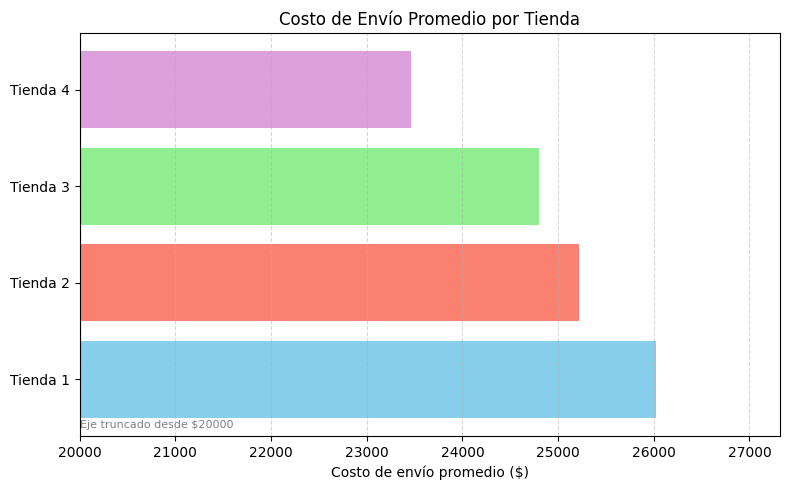

In [14]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios_envio = [promedio_envio_t1, promedio_envio_t2, promedio_envio_t3, promedio_envio_t4]

plt.figure(figsize=(8, 5))
plt.barh(tiendas, promedios_envio, color=['skyblue', 'salmon', 'lightgreen', 'plum'])
plt.xlabel('Costo de envío promedio ($)')
plt.title('Costo de Envío Promedio por Tienda')

plt.xlim(20000, max(promedios_envio) * 1.05)

plt.axvline(20000, color='gray', linestyle='--', linewidth=0.8)


plt.text(20000, -0.5, 'Eje truncado desde $20000', fontsize=8, color='gray')

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 📄 Informe Final – Recomendación para el Sr. Juan



### Introducción

Durante este análisis, se evaluaron múltiples indicadores de desempeño para las cuatro tiendas de la cadena **Alura Store**, con el objetivo de identificar cuál de ellas debería ser vendida por el Sr. Juan. Esta decisión tiene como finalidad liberar recursos financieros y operativos para emprender un nuevo proyecto. Se analizaron factores clave como la facturación total, categorías de productos vendidos, calificaciones de los clientes, productos más y menos vendidos, y los costos promedio de envío.

---

### Desarrollo

#### 1. Facturación total por tienda

- **Tienda 1:** \$1.150.880.400  
- **Tienda 2:** \$1.116.343.500  
- **Tienda 3:** \$1.098.019.600  
- **Tienda 4:** \$1.038.375.700  

📉 *La Tienda 4 es la que menos ingresos genera, lo que representa una debilidad desde el punto de vista financiero.*

---

#### 2. Ventas por categoría de productos

En todas las tiendas, los productos más vendidos pertenecen a las categorías **Muebles** y **Electrónicos**. Sin embargo, la Tienda 4 muestra **menores volúmenes generales**, especialmente en **Electrodomésticos** (apenas 254 ventas frente a más de 300 en las otras tiendas), lo cual indica un menor dinamismo comercial.

---


### 3. Calificación promedio de clientes

- **Tienda 3:** 4.05  
- **Tienda 2:** 4.04  
- **Tienda 4:** 4.00  
- **Tienda 1:** 3.98  

📊 *Aunque la Tienda 1 tiene la calificación más baja, la Tienda 4 está por debajo del promedio general y no destaca en ningún otro aspecto positivo.*

---

### 4. Productos más y menos vendidos

La Tienda 4 muestra menor diversidad entre sus productos más vendidos. Además, varios de sus productos menos vendidos coinciden con los que son populares en otras tiendas (por ejemplo, **guitarra acústica**, **armario**), lo que sugiere una **baja rotación de stock o menor demanda local**.

---

### 5. Costo de envío promedio

- **Tienda 4:** \$23.459  
- **Tienda 3:** \$24.805  
- **Tienda 2:** \$25.216  
- **Tienda 1:** \$26.018  

📦 *La Tienda 4 tiene el menor costo de envío, pero este aspecto no logra compensar su bajo rendimiento general.*

---

## Conclusión

Tras considerar todos los factores analizados, se recomienda que **el Sr. Juan venda la Tienda 4**. Esta tienda presenta el desempeño más débil en términos de:

- Ingresos
- Volumen de ventas
- Rotación de productos

Si bien tiene un costo de envío bajo y una calificación aceptable, **no compensa su bajo rendimiento comercial**. Vender la Tienda 4 permitirá liberar capital y recursos para desarrollar un nuevo emprendimiento con mayores posibilidades de éxito.

---

✅ **Recomendación Final: Vender la Tienda 4**

# Análisis Geográfico

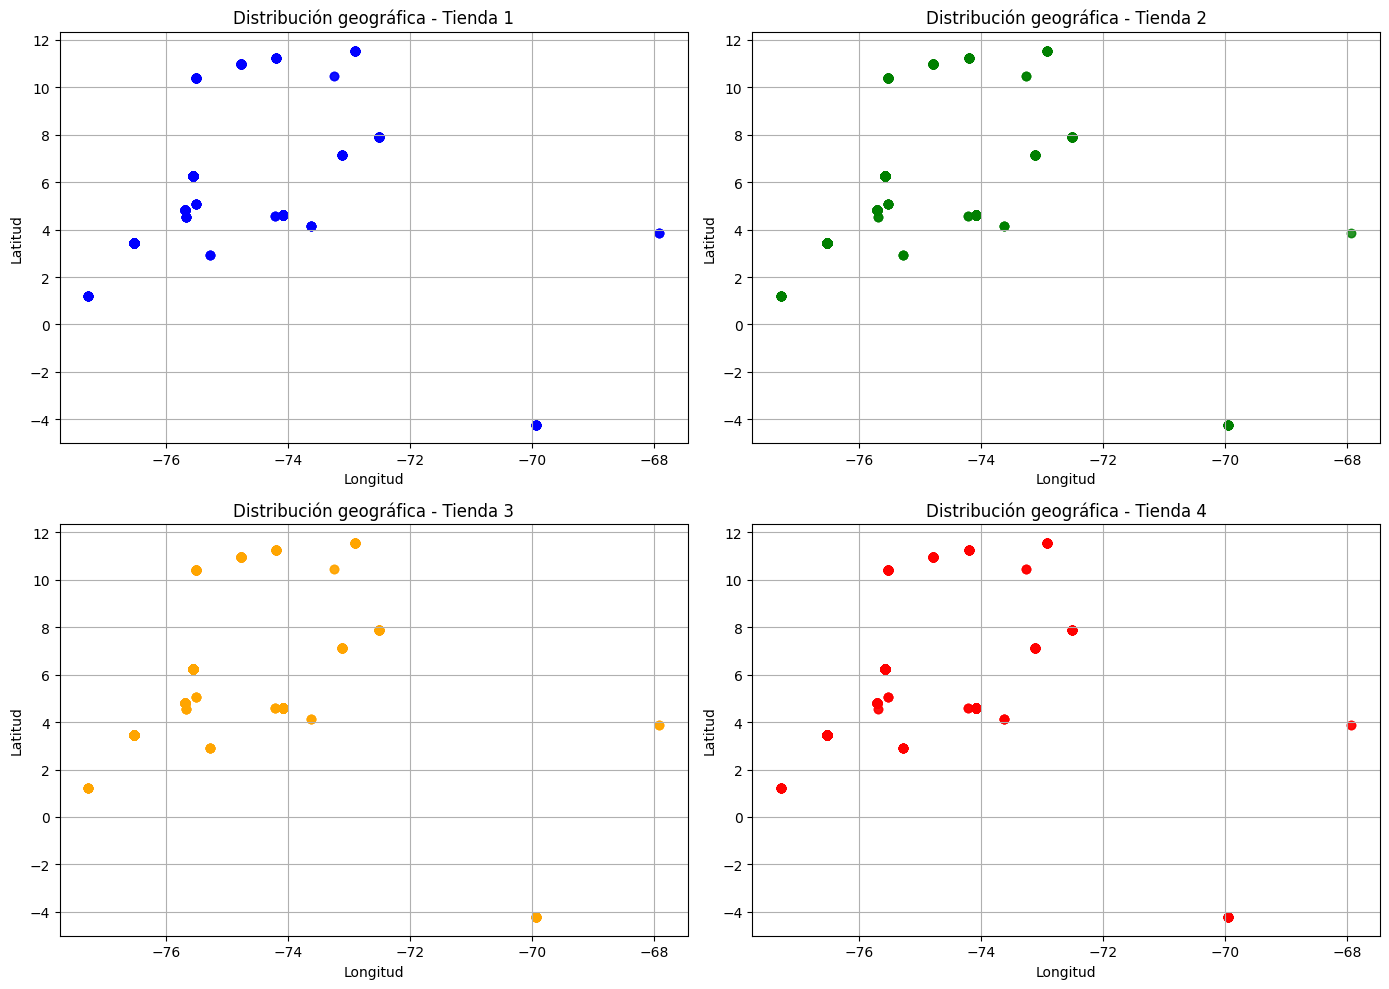

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['blue', 'green', 'orange', 'red']

for i in range(4):
    axs[i].scatter(tiendas[i]['lon'], tiendas[i]['lat'], alpha=0.6, color=colores[i])
    axs[i].set_title(f'Distribución geográfica - {nombres[i]}')
    axs[i].set_xlabel('Longitud')
    axs[i].set_ylabel('Latitud')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [27]:
import folium
from folium.plugins import HeatMap

def generar_heatmap(df_tienda, nombre):
    m = folium.Map(location=[df_tienda['lat'].mean(), df_tienda['lon'].mean()], zoom_start=5)
    heat_data = df_tienda[['lat', 'lon']].dropna().values.tolist()
    HeatMap(heat_data, radius=10).add_to(m)
    return m

generar_heatmap(tienda, 'Tienda 1')

In [ ]:
generar_heatmap(tienda2, 'Tienda 2')

In [ ]:
generar_heatmap(tienda3, 'Tienda 3')

In [ ]:
generar_heatmap(tienda4, 'Tienda 4')

In [29]:
for i, tienda in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    print(f"--- Tienda {i} ---")
    tienda['Monto Venta'] = tienda['Precio'] + tienda['Costo de envío']
    tienda['lat_round'] = tienda['lat'].round(1)
    tienda['lon_round'] = tienda['lon'].round(1)

    stats = tienda.groupby(['lat_round', 'lon_round']).agg({
        'Monto Venta': 'mean',
        'Calificación': 'mean',
        'Producto': 'count'
    }).reset_index().rename(columns={'Producto': 'Cantidad de Ventas'})

    display(stats.head())

--- Tienda 1 ---


,lat_round,lon_round,Monto Venta,Calificación,Cantidad de Ventas
0,-4.2,-69.9,482881.250000,4.156250,32
1,1.2,-77.3,687095.652174,4.043478,23
2,2.9,-75.3,613850.000000,4.500000,6
3,3.4,-76.5,574741.696113,3.985866,283
4,3.9,-67.9,572960.000000,4.000000,5


--- Tienda 2 ---


,lat_round,lon_round,Monto Venta,Calificación,Cantidad de Ventas
0,-4.2,-69.9,5.005941e+05,4.000000,34
1,1.2,-77.3,5.389920e+05,4.280000,25
2,2.9,-75.3,6.759333e+05,4.333333,6
3,3.4,-76.5,5.610045e+05,4.252252,222
4,3.9,-67.9,1.317200e+06,2.500000,2


--- Tienda 3 ---


,lat_round,lon_round,Monto Venta,Calificación,Cantidad de Ventas
0,-4.2,-69.9,493858.536585,3.756098,41
1,1.2,-77.3,447612.500000,4.000000,16
2,2.9,-75.3,458380.000000,3.400000,10
3,3.4,-76.5,464125.000000,4.056452,248
4,3.9,-67.9,352250.000000,3.750000,4


--- Tienda 4 ---


,lat_round,lon_round,Monto Venta,Calificación,Cantidad de Ventas
0,-4.2,-69.9,514982.857143,3.828571,35
1,1.2,-77.3,506260.000000,4.200000,30
2,2.9,-75.3,537994.444444,3.611111,18
3,3.4,-76.5,516307.480315,3.925197,254
4,3.9,-67.9,535833.333333,3.666667,3


from matplotlib import pyplot as plt
_df_0['lat_round'].plot(kind='hist', bins=20, title='lat_round')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['lon_round'].plot(kind='hist', bins=20, title='lon_round')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Monto Venta'].plot(kind='hist', bins=20, title='Monto Venta')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Calificación'].plot(kind='hist', bins=20, title='Calificación')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='lat_round', y='lon_round', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='lon_round', y='Monto Venta', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Monto Venta', y='Calificación', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Calificación', y='Cantidad de Ventas', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lat_round']
  ys = series['lon_round']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('lat_round', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lat_round')
_ = plt.ylabel('lon_round')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lat_round']
  ys = series['Monto Venta']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('lat_round', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lat_round')
_ = plt.ylabel('Monto Venta')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lat_round']
  ys = series['Calificación']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('lat_round', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lat_round')
_ = plt.ylabel('Calificación')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lat_round']
  ys = series['Cantidad de Ventas']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('lat_round', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lat_round')
_ = plt.ylabel('Cantidad de Ventas')

from matplotlib import pyplot as plt
_df_12['lat_round'].plot(kind='line', figsize=(8, 4), title='lat_round')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['lon_round'].plot(kind='line', figsize=(8, 4), title='lon_round')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Monto Venta'].plot(kind='line', figsize=(8, 4), title='Monto Venta')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Calificación'].plot(kind='line', figsize=(8, 4), title='Calificación')
plt.gca().spines[['top', 'right']].set_visible(False)